In [205]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [206]:
data=pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [207]:
data.rename(columns={'Unnamed: 0':'state'},inplace=True)
data

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [209]:
data.isna().sum()

state       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [210]:
data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

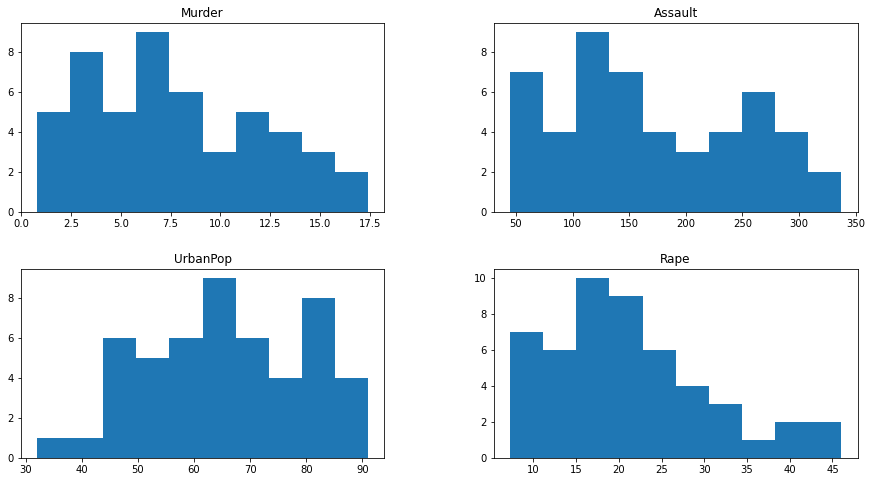

In [211]:
data.hist(figsize=(15,8),grid=False)

### Normalization function 

In [212]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [213]:
df_norm = norm_func(data.iloc[:,1:])

In [214]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Heirarchical Clustering

In [215]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

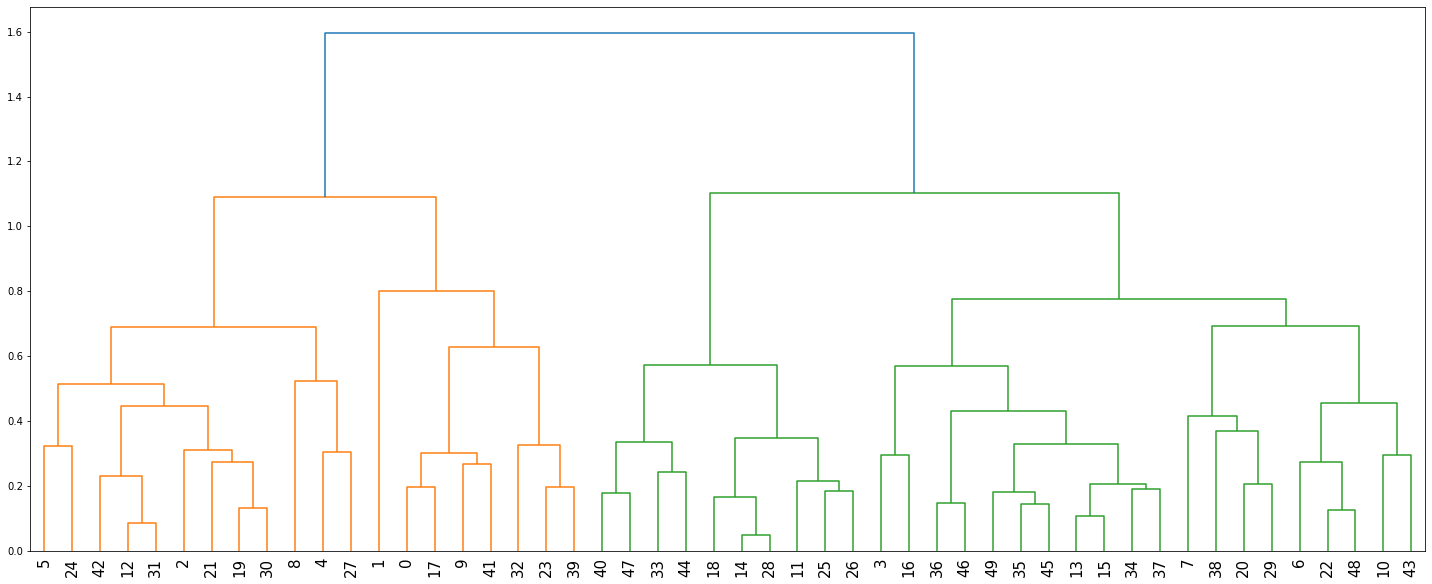

In [216]:
# create dendrogram
plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'),leaf_font_size=15)

In [217]:
??AgglomerativeClustering

In [218]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [219]:
hc.fit_predict(df_norm)

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0], dtype=int64)

In [220]:
data['h_clusterid'] = hc.fit_predict(df_norm)

In [221]:
data

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [222]:
data.groupby(["h_clusterid"])["state"].apply(lambda x:tuple(x))

h_clusterid
0    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
1    (Arizona, California, Colorado, Florida, Illin...
2    (Idaho, Iowa, Maine, Montana, Nebraska, New Ha...
3    (Alabama, Georgia, Louisiana, Mississippi, Nor...
4                                            (Alaska,)
Name: state, dtype: object

In [223]:
data[data["state"].isin(["Arkansas","Montana","Louisiana"])]

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
3,Arkansas,8.8,190,50,19.5,0
17,Louisiana,15.4,249,66,22.2,3
25,Montana,6.0,109,53,16.4,2


In [224]:
data1=data.sort_values('h_clusterid')
data1.iloc[:,[0,-1]]

,state,h_clusterid
49,Wyoming,0
20,Massachusetts,0
29,New Jersey,0
16,Kentucky,0
15,Kansas,0
34,Ohio,0
13,Indiana,0
35,Oklahoma,0
22,Minnesota,0
10,Hawaii,0


# K mean

In [235]:
from sklearn.cluster import KMeans

In [249]:
model_kmeans = KMeans(n_clusters=4)
model_kmeans.fit(df_norm)

KMeans(n_clusters=4)

In [250]:
model_kmeans.fit(df_norm).n_clusters

4

In [256]:
model_kmeans.fit(df_norm).cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [257]:
model_kmeans.fit(df_norm).labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

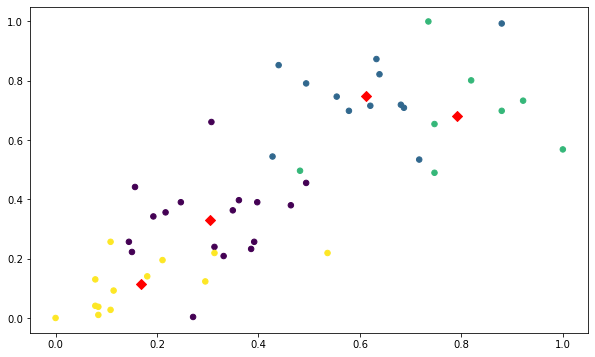

In [258]:
plt.figure(figsize=(10,6))
plt.scatter(df_norm.iloc[:,0], df_norm.iloc[:,1],c= model_kmeans.fit(df_norm).labels_, s = 30, cmap = "viridis")
centers = model_kmeans.fit(df_norm).cluster_centers_                           
plt.scatter(centers[:,0], centers[:,1], c = "red", s = 50, alpha =1,marker="D");

In [171]:
data["labels"]=pd.Series(model_kmeans.labels_)
data

,state,Murder,Assault,UrbanPop,Rape,h_clusterid,labels
0,Alabama,13.2,236,58,21.2,3,1
1,Alaska,10.0,263,48,44.5,4,2
2,Arizona,8.1,294,80,31.0,1,2
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,1,2
5,Colorado,7.9,204,78,38.7,1,2
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,1,2
9,Georgia,17.4,211,60,25.8,3,1


In [172]:
data.groupby(["labels"])["state"].apply(lambda x:tuple(x))

labels
0    (Connecticut, Delaware, Hawaii, Indiana, Kansa...
1    (Alabama, Arkansas, Georgia, Louisiana, Missis...
2    (Alaska, Arizona, California, Colorado, Florid...
3    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
Name: state, dtype: object

In [173]:
data[data["state"].isin(["Alaska","Arizona","California","California"])]

,state,Murder,Assault,UrbanPop,Rape,h_clusterid,labels
1,Alaska,10.0,263,48,44.5,4,2
2,Arizona,8.1,294,80,31.0,1,2
4,California,9.0,276,91,40.6,1,2


In [174]:
data2=data.sort_values('labels')
data2.iloc[:,[0,-1]]

,state,labels
49,Wyoming,0
29,New Jersey,0
15,Kansas,0
34,Ohio,0
13,Indiana,0
35,Oklahoma,0
36,Oregon,0
10,Hawaii,0
37,Pennsylvania,0
7,Delaware,0


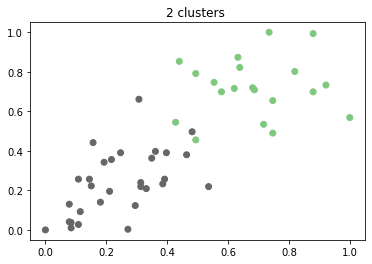

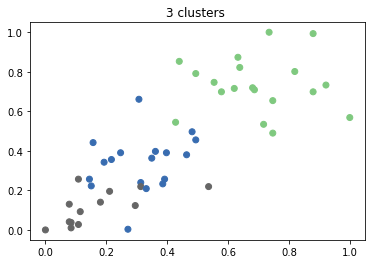

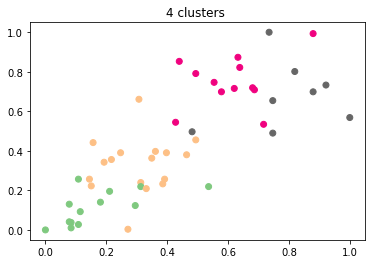

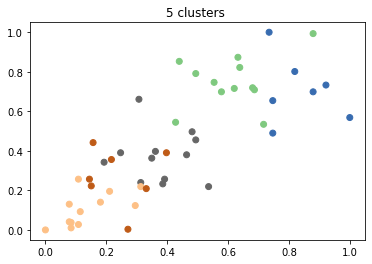

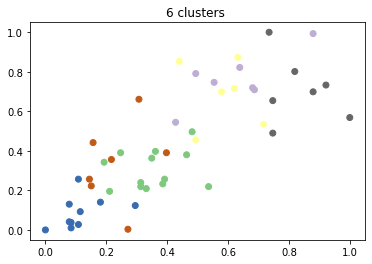

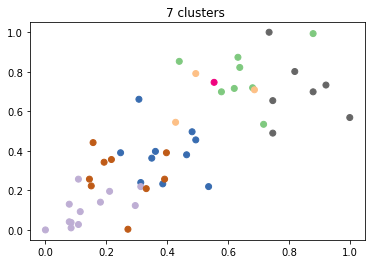

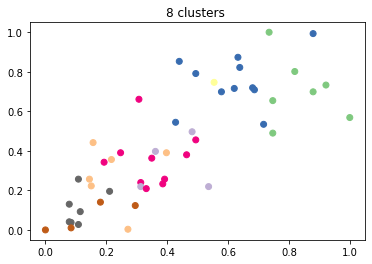

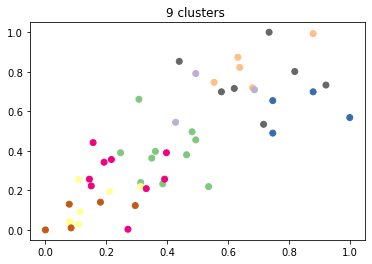

In [175]:
for i in range(2,10):
    model = KMeans(n_clusters=i, max_iter=600, algorithm = 'auto',init="k-means++",)
    model.fit(df_norm)    
    pred=model.predict(df_norm)    
    plt.scatter(df_norm.iloc[:,0], df_norm.iloc[:,1],c=model.labels_,cmap=plt.cm.Accent)
    plt.title(str(i)+ " clusters ")
    plt.show()

In [176]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(df_norm)
    iner.append(km.inertia_)

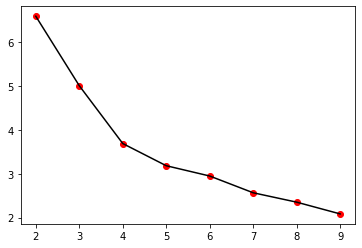

In [177]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

# DBSCAN

In [150]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import MinMaxScaler

In [151]:
df=pd.read_csv('crime_data.csv')
df.rename(columns={'Unnamed: 0':"state"},inplace=True)
df.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
stdscaler=StandardScaler()
x=pd.DataFrame(stdscaler.fit_transform(df.iloc[:,1:]),columns=df_norm.columns)
x

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [156]:
dbs=DBSCAN(min_samples=2,eps=0.7)
class_pr= dbs.fit_predict(x.iloc[:,:2])

In [157]:
claas_pr

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

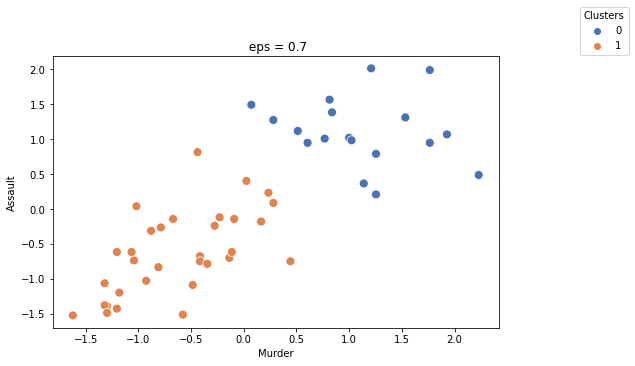

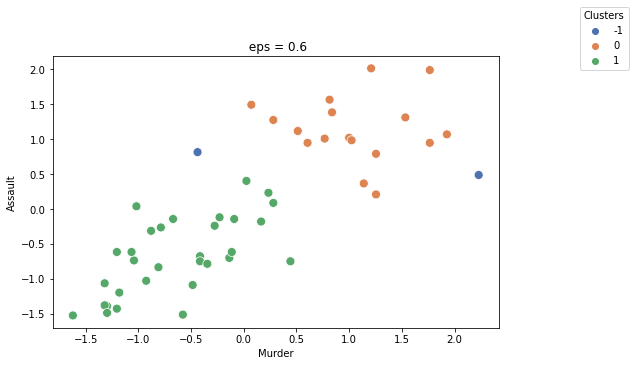

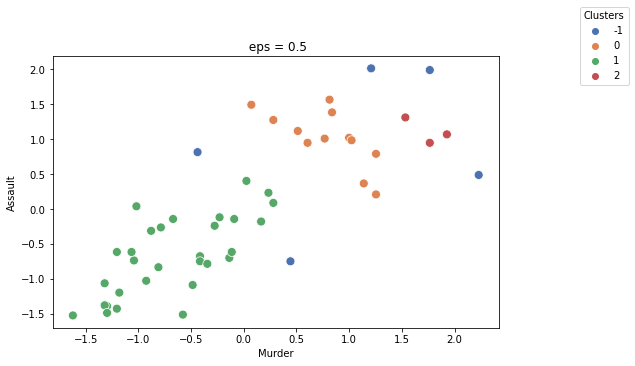

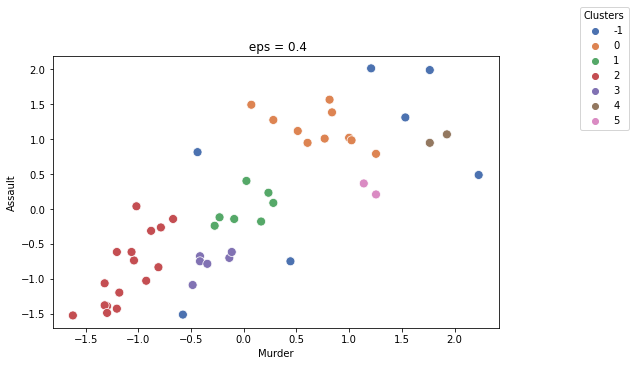

In [165]:
N=[0.7,0.6,0.5,0.4]
for i in N:
    dbs=DBSCAN(min_samples=2,eps=i)
    claas_pr=dbs.fit_predict(x.iloc[:,:2])
    plt.figure(figsize=(8,5))
    p = sns.scatterplot(data=x, x="Murder", y="Assault", hue=claas_pr, legend="full", palette="deep",s=80)
    sns.move_legend(p, "upper left", bbox_to_anchor=(1.17, 1.2), title='Clusters')
    plt.title(" eps = "+str(i))
    plt.show()